Department of Physics, University of Pisa (AA 2022-2023)

### Multimessenger Physics Laboratory tutorial series



## Exercise 01 - Correlating source catalogs
#### (M. Razzano, Feb 21, 2023)

In this exercise you will have to read and manipulate source catalogs using Pandas and find correlations among sources of different classes. 

We will use two catalogs of sources

* **The Fourth Catalog of Fermi Sources (4FGL)**, a catalog of gamma-ray point sources collected during 8 years of observations of the Large Area Telescope onboard the Fermi mission. The reference for 4FGL is [S. Abdollahi et al 2020 ApJS 247 33](https://iopscience.iop.org/article/10.3847/1538-4365/ab6bcb)
* **The ROSAT all-sky survey bright source catalogue (1RX)**, a catalog of X-ray point sources collected by the Roentgen satellite. The reference for 1RX is [Voges et al. 1990, A&A, 349,389](http://adsabs.harvard.edu/full/1999A%26A...349..389V)

**Please note** The references here are for completeness, you do not need to read the full (and long) papers to perform the exercises. However, if you want to do it, you are certainly welcome!

### Basic Setup
As usual, in the cell below you should import the modules that you think you will require...

In [1]:
import os
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord

# Import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

#Now, import the FITS module inside Astropy
from astropy.io import fits

#Define the various directories
excercise_dir = os.getcwd()

#using dirname you can go up of one directory
main_dir = os.path.dirname(excercise_dir)

#then use join to define variables pointing to subdirectories
data_dir = os.path.join(main_dir,"data")

print("Project main dir is %s" % main_dir)
print("Data dir is %s" %data_dir)
print("Tutorials dir is %s" %excercise_dir)

#we can create a results dir, if it is not here
results_dir = os.path.join(main_dir,"results")

if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    
print("Results dir is %s" %results_dir)

Project main dir is /home/jovyan/astrophysics_2023/homework/homework-02---data-manipulation-with-pandas-hussainkitagawa
Data dir is /home/jovyan/astrophysics_2023/homework/homework-02---data-manipulation-with-pandas-hussainkitagawa/data
Tutorials dir is /home/jovyan/astrophysics_2023/homework/homework-02---data-manipulation-with-pandas-hussainkitagawa/exercises
Results dir is /home/jovyan/astrophysics_2023/homework/homework-02---data-manipulation-with-pandas-hussainkitagawa/results


### Open and explore the 4FGL catalog

You can find the 4FGL catalog in the FITS file *fermi_lat_4fgl_gll_psc_v22.fits* in the data directory.

Open it using astropy and have a look at it (what are the columns, etc) and finally convert to a Pandas dataframe, and do some basic data exploration and plotting

In [2]:
#open the file using astropy
input_filename = os.path.join(data_dir,"fermi_lat_4fgl_gll_psc_v22.fits")

#First, you can open the file and check the information in it
fits_info = fits.open(input_filename)
#info 8
fits_info.info()

Filename: /home/jovyan/astrophysics_2023/homework/homework-02---data-manipulation-with-pandas-hussainkitagawa/data/fermi_lat_4fgl_gll_psc_v22.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  LAT_Point_Source_Catalog    1 BinTableHDU    482   5065R x 84C   [18A, E, E, E, E, E, E, E, E, E, E, I, 18A, E, E, E, E, E, E, 17A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 7E, 14E, 7E, 7E, E, E, E, E, E, E, D, E, 8E, 16E, 8E, E, E, E, E, E, E, D, E, 48E, 96E, 48E, 18A, 18A, 18A, 18A, 18A, A, 26A, 5A, 5A, 28A, 26A, E, E, D, D, E, I]   
  2  ExtendedSources    1 BinTableHDU     74   75R x 11C   [17A, E, E, E, E, 11A, E, E, E, 11A, 24A]   
  3  ROIs          1 BinTableHDU    119   1748R x 12C   [I, E, E, E, E, E, E, E, E, E, E, E]   
  4  Components    1 BinTableHDU     53   15R x 9C   [E, E, I, I, E, E, E, I, I]   
  5  EnergyBounds    1 BinTableHDU     75   19R x 10C   [E, E, E, I, I, E, E, E, I, I]   
 

In [3]:
# How many columns you can see? Remove every column except from the name, coordinates, and the Conf 95 SemiMajor 
# (the uncertainty in position), and source class (CLASS1). 
# Make sure that the CLASS1 is well formatted, i.e. uppercase and with no blank spaces

In [4]:
#Now, we want to read the HDU 1. We can do by specifying the ext parameter
data, header = fits.getdata(input_filename, ext=1,header=True)

#and we can look at the header
data.columns

ColDefs(
    name = 'Source_Name'; format = '18A'
    name = 'RAJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'DEJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLON'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLAT'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_SemiMajor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_SemiMinor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_PosAng'; format = 'E'; unit = 'deg'; disp = 'F8.3'
    name = 'Conf_95_SemiMajor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_95_SemiMinor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_95_PosAng'; format = 'E'; unit = 'deg'; disp = 'F8.3'
    name = 'ROI_num'; format = 'I'; null = 16959
    name = 'Extended_Source_Name'; format = '18A'
    name = 'Signif_Avg'; format = 'E'; disp = 'F8.3'
    name = 'Pivot_Energy'; format = 'E'; unit = 'MeV'; disp = 'F10.2'
    name = 'Flux1000'; format = 'E'; uni

In [5]:
#Now convert to an astropy Table
#Now we convert the data to a Astropy Table object
from astropy.table import Table

sources_data = Table(data)
print("Data contains %d LAT sources" % len(sources_data))

Data contains 5065 LAT sources


In [6]:
sources_data.colnames

['Source_Name',
 'RAJ2000',
 'DEJ2000',
 'GLON',
 'GLAT',
 'Conf_68_SemiMajor',
 'Conf_68_SemiMinor',
 'Conf_68_PosAng',
 'Conf_95_SemiMajor',
 'Conf_95_SemiMinor',
 'Conf_95_PosAng',
 'ROI_num',
 'Extended_Source_Name',
 'Signif_Avg',
 'Pivot_Energy',
 'Flux1000',
 'Unc_Flux1000',
 'Energy_Flux100',
 'Unc_Energy_Flux100',
 'SpectrumType',
 'PL_Flux_Density',
 'Unc_PL_Flux_Density',
 'PL_Index',
 'Unc_PL_Index',
 'LP_Flux_Density',
 'Unc_LP_Flux_Density',
 'LP_Index',
 'Unc_LP_Index',
 'LP_beta',
 'Unc_LP_beta',
 'LP_SigCurv',
 'PLEC_Flux_Density',
 'Unc_PLEC_Flux_Density',
 'PLEC_Index',
 'Unc_PLEC_Index',
 'PLEC_Expfactor',
 'Unc_PLEC_Expfactor',
 'PLEC_Exp_Index',
 'Unc_PLEC_Exp_Index',
 'PLEC_SigCurv',
 'Npred',
 'Flux_Band',
 'Unc_Flux_Band',
 'nuFnu_Band',
 'Sqrt_TS_Band',
 'Variability_Index',
 'Frac_Variability',
 'Unc_Frac_Variability',
 'Signif_Peak',
 'Flux_Peak',
 'Unc_Flux_Peak',
 'Time_Peak',
 'Peak_Interval',
 'Flux_History',
 'Unc_Flux_History',
 'Sqrt_TS_History',
 'Va

In [7]:
#first, check the columns to remove
cols_to_remove=[]

#We need to remove columns in order to convert it in a pandas dataframe
for ci in sources_data.colnames:
    #print(ci)
    if ci == 'Source_Name': continue
    if ci == 'RAJ2000': continue
    if ci == 'DEJ2000': continue
    if ci == 'GLON': continue
    if ci == 'GLAT': continue
    if ci == 'Conf_95_SemiMajor': continue
    if ci == 'CLASS1': continue
    #if ci == 'Flux_Band': continue
    cols_to_remove.append(ci)

# Identify the columns to remove
for ci in sources_data.colnames:
    if len(sources_data[ci].shape) > 1:
       cols_to_remove.append(ci)
        
print("Columns to remove:")
print(cols_to_remove)

Columns to remove:
['Conf_68_SemiMajor', 'Conf_68_SemiMinor', 'Conf_68_PosAng', 'Conf_95_SemiMinor', 'Conf_95_PosAng', 'ROI_num', 'Extended_Source_Name', 'Signif_Avg', 'Pivot_Energy', 'Flux1000', 'Unc_Flux1000', 'Energy_Flux100', 'Unc_Energy_Flux100', 'SpectrumType', 'PL_Flux_Density', 'Unc_PL_Flux_Density', 'PL_Index', 'Unc_PL_Index', 'LP_Flux_Density', 'Unc_LP_Flux_Density', 'LP_Index', 'Unc_LP_Index', 'LP_beta', 'Unc_LP_beta', 'LP_SigCurv', 'PLEC_Flux_Density', 'Unc_PLEC_Flux_Density', 'PLEC_Index', 'Unc_PLEC_Index', 'PLEC_Expfactor', 'Unc_PLEC_Expfactor', 'PLEC_Exp_Index', 'Unc_PLEC_Exp_Index', 'PLEC_SigCurv', 'Npred', 'Flux_Band', 'Unc_Flux_Band', 'nuFnu_Band', 'Sqrt_TS_Band', 'Variability_Index', 'Frac_Variability', 'Unc_Frac_Variability', 'Signif_Peak', 'Flux_Peak', 'Unc_Flux_Peak', 'Time_Peak', 'Peak_Interval', 'Flux_History', 'Unc_Flux_History', 'Sqrt_TS_History', 'Variability2_Index', 'Frac2_Variability', 'Unc_Frac2_Variability', 'Signif2_Peak', 'Flux2_Peak', 'Unc_Flux2_Peak'

In [10]:
# Remove the multidimensional columns
for ci in cols_to_remove:
    try:
        sources_data.remove_column(ci)
        print("Removing %s" % ci)
    except KeyError:
        print("Empty" % ci)

Column Conf_68_SemiMajor does not exist. Skipping removal.
Column Conf_68_SemiMinor does not exist. Skipping removal.
Column Conf_68_PosAng does not exist. Skipping removal.
Column Conf_95_SemiMinor does not exist. Skipping removal.
Column Conf_95_PosAng does not exist. Skipping removal.
Column ROI_num does not exist. Skipping removal.
Column Extended_Source_Name does not exist. Skipping removal.
Column Signif_Avg does not exist. Skipping removal.
Column Pivot_Energy does not exist. Skipping removal.
Column Flux1000 does not exist. Skipping removal.
Column Unc_Flux1000 does not exist. Skipping removal.
Column Energy_Flux100 does not exist. Skipping removal.
Column Unc_Energy_Flux100 does not exist. Skipping removal.
Column SpectrumType does not exist. Skipping removal.
Column PL_Flux_Density does not exist. Skipping removal.
Column Unc_PL_Flux_Density does not exist. Skipping removal.
Column PL_Index does not exist. Skipping removal.
Column Unc_PL_Index does not exist. Skipping removal

In [11]:
sources_data.colnames

['Source_Name',
 'RAJ2000',
 'DEJ2000',
 'GLON',
 'GLAT',
 'Conf_95_SemiMajor',
 'CLASS1']

In [12]:
#And then to a Pandas dataframe
sources_df = sources_data.to_pandas()
#sources_df.sample(5)
sources_df

,Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_95_SemiMajor,CLASS1
0,4FGL J0000.3-7355,0.098300,-73.921997,307.708984,-42.729538,0.0525,
1,4FGL J0001.2+4741,0.312600,47.685902,114.250198,-14.338059,0.0598,bcu
2,4FGL J0001.2-0747,0.315100,-7.797100,89.032722,-67.305008,0.0299,bll
3,4FGL J0001.5+2113,0.381500,21.218300,107.649353,-40.167652,0.0422,fsrq
4,4FGL J0001.6-4156,0.416500,-41.942501,334.226349,-72.028549,0.0692,bcu
...,...,...,...,...,...,...,...
5060,4FGL J2359.0-3038,359.771912,-30.636700,12.809109,-78.024170,0.0228,bll
5061,4FGL J2359.1+1719,359.775604,17.322500,105.517410,-43.772465,0.0542,bcu
5062,4FGL J2359.3-2049,359.835693,-20.818899,58.090145,-76.542862,0.0399,bll
5063,4FGL J2359.3+1444,359.838989,14.749800,104.564713,-46.256252,0.2217,


In [13]:
n_sources = len(sources_df)
print("N sources = %d" % n_sources)

#how many classes? We use the unique function of numpy on the CLASS 1
src_class = np.unique(sources_df["CLASS1"])

print("Found %d Classes: ",len(src_class),src_class)

N sources = 5065
Found %d Classes:  35 ['     ' 'AGN  ' 'BCU  ' 'BIN  ' 'BLL  ' 'FSRQ ' 'GAL  ' 'HMB  ' 'LMB  '
 'NLSY1' 'NOV  ' 'PSR  ' 'PWN  ' 'RDG  ' 'SFR  ' 'SNR  ' 'agn  ' 'bcu  '
 'bll  ' 'css  ' 'fsrq ' 'gal  ' 'glc  ' 'hmb  ' 'lmb  ' 'nlsy1' 'psr  '
 'pwn  ' 'rdg  ' 'sbg  ' 'sey  ' 'snr  ' 'spp  ' 'ssrq ' 'unk  ']


In [14]:
#some class names are lowercase, make all uppercase
sources_df["CLASS1"] = sources_df["CLASS1"].str.upper()

#re-define the class names one time...
src_class = np.unique(sources_df["CLASS1"])
print("Found %d Classes: ",len(src_class),src_class)

Found %d Classes:  23 ['     ' 'AGN  ' 'BCU  ' 'BIN  ' 'BLL  ' 'CSS  ' 'FSRQ ' 'GAL  ' 'GLC  '
 'HMB  ' 'LMB  ' 'NLSY1' 'NOV  ' 'PSR  ' 'PWN  ' 'RDG  ' 'SBG  ' 'SEY  '
 'SFR  ' 'SNR  ' 'SPP  ' 'SSRQ ' 'UNK  ']


In [15]:
#still, class names contains blank spaces, let's get rid of them
sources_df["CLASS1"] = sources_df["CLASS1"].str.strip(" ")

#re-define the class names one time...
src_class = np.unique(sources_df["CLASS1"])
print("Found %d Classes: ",len(src_class),src_class)

Found %d Classes:  23 ['' 'AGN' 'BCU' 'BIN' 'BLL' 'CSS' 'FSRQ' 'GAL' 'GLC' 'HMB' 'LMB' 'NLSY1'
 'NOV' 'PSR' 'PWN' 'RDG' 'SBG' 'SEY' 'SFR' 'SNR' 'SPP' 'SSRQ' 'UNK']


In [16]:
#How many unidentified?  
mask_unid = sources_df["CLASS1"]==""
print(mask_unid[:20])

print("Num unidentified sources: %d" % len(sources_df[mask_unid]))

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13     True
14    False
15     True
16    False
17    False
18     True
19     True
Name: CLASS1, dtype: bool
Num unidentified sources: 1336


In [17]:
print("10 Random unidentified sources")
sources_df[mask_unid].sample(3)

10 Random unidentified sources


,Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_95_SemiMajor,CLASS1
4512,4FGL J2041.1+4736,310.295593,47.602901,86.096680,3.453769,0.0249,
3753,4FGL J1758.3-1920,269.596191,-19.343399,9.738242,2.385627,0.0704,
3406,4FGL J1701.9-4625,255.495895,-46.431801,340.725525,-2.776890,0.1369,


In [18]:
#Make some plots that shows the distribution in l,b, 
#using histograms of different colors for each source class in CLASS1

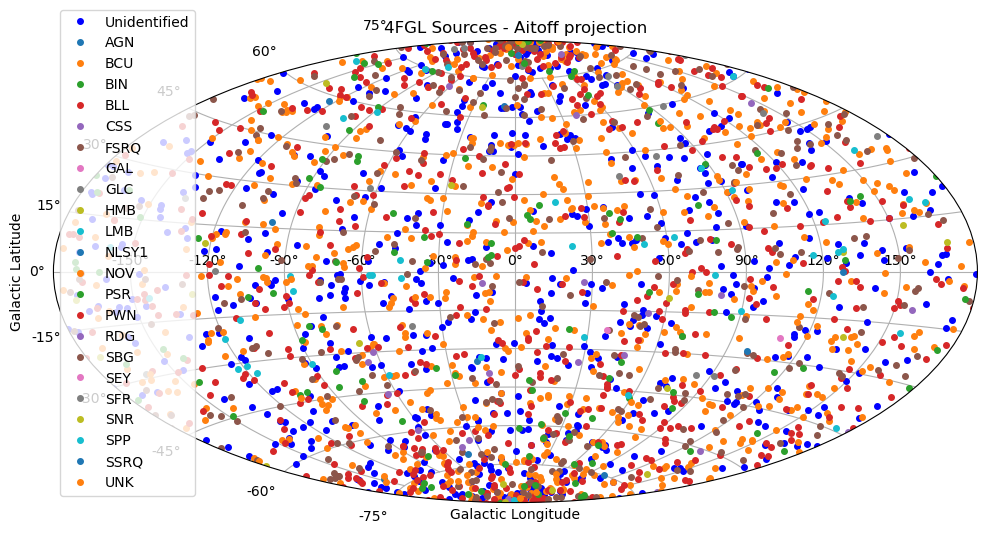

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(1,figsize=(12,6))
plt.subplot(111, projection="aitoff")
plt.grid(True)
plt.plot(sources_df[mask_unid]["GLON"],sources_df[mask_unid]["GLAT"], 'o', markersize=4, color="blue",label="Unidentified")

for src_cls in src_class:
    if src_cls == "":
        continue  # unidentified sources
    identified_cls = sources_df["CLASS1"] == src_cls
    plt.plot(sources_df[identified_cls]["GLON"], sources_df[identified_cls]["GLAT"], 'o', markersize=4, label=src_cls)
    
plt.xlabel("Galactic Longitude")
plt.ylabel("Galactic Latitude")
plt.title("4FGL Sources - Aitoff projection")
plt.legend()
plt.show()

#we can save the plots in the results dir
out_name = os.path.join(results_dir,"id_skymap.png")
plt.savefig(out_name)

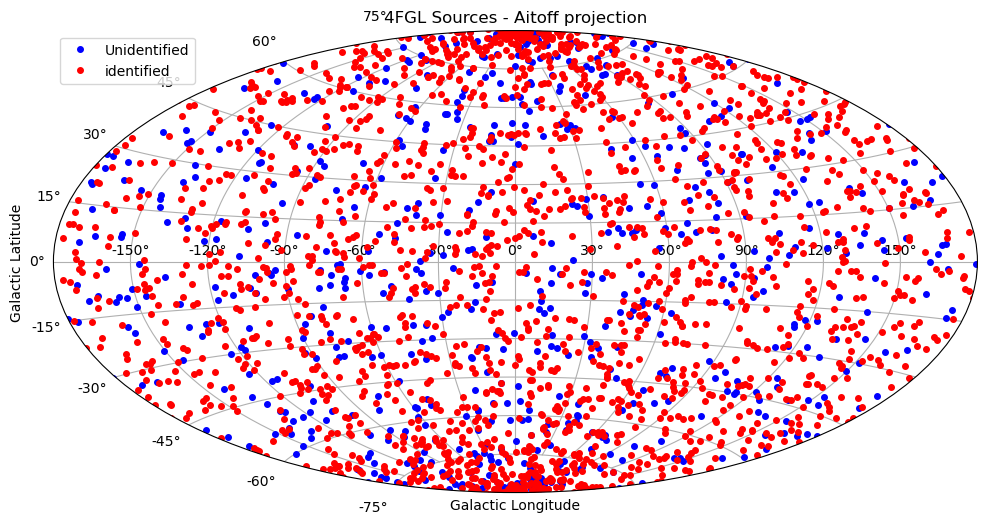

<Figure size 640x480 with 0 Axes>

In [20]:
#Plot Galactic sky distribution 
plt.figure(1,figsize=(12,6))
plt.subplot(111, projection="aitoff")
plt.grid(True)
plt.plot(sources_df[mask_unid]["GLON"],sources_df[mask_unid]["GLAT"], 'o', markersize=4, color="blue",label="Unidentified")


#The identified are the NOT of the mask, that can be obtained with np.invert
mask_id = np.invert(mask_unid)
plt.plot(sources_df[mask_id]["GLON"],sources_df[mask_id]["GLAT"], 'o', markersize=4, color="red",label="identified")
plt.xlabel("Galactic Longitude")
plt.ylabel("Galactic Latitude")
plt.title("4FGL Sources - Aitoff projection")

plt.legend()
plt.show()

#we can save the plots in the results dir
out_name = os.path.join(results_dir,"id_vs_unid_skymap.1.png")
plt.savefig(out_name)

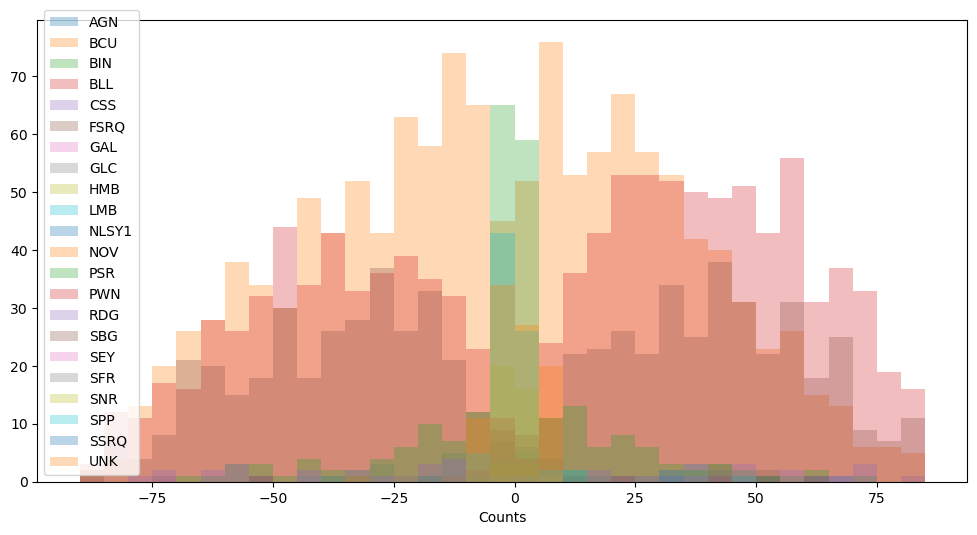

In [21]:
plt.figure(2,figsize=(12,6))

b_bins=np.arange(-90,90,5)

for src_cls in src_class:
    if src_cls == "":
        #unidentified sources
        continue  
    identified_cls = sources_df["CLASS1"] == src_cls
    plt.hist(sources_df[identified_cls]["GLAT"], bins=b_bins, label=src_cls, alpha=0.3)
    

plt.xlabel("Galactic Latitude")
plt.xlabel("Counts")
plt.legend()


out_name = os.path.join(results_dir,"id_distribution.0.png")
plt.savefig(out_name)

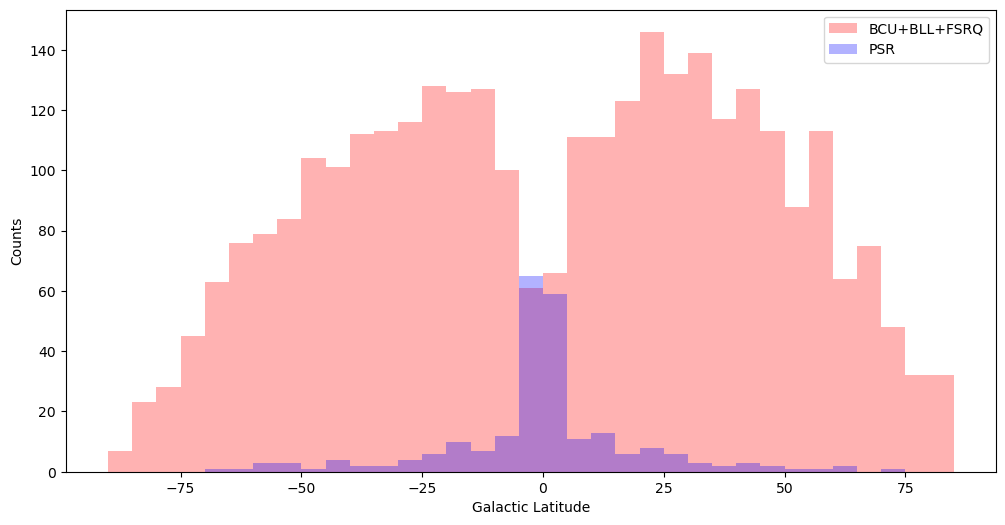

In [52]:
#galactic latitude distributions of pulsars (PSR) vs blazars (BLL+FSRQ+BCU)?
mask_psr = sources_df["CLASS1"]=="PSR"
mask_blazar = (sources_df["CLASS1"]=="BCU") | (sources_df["CLASS1"]=="BLL") | (sources_df["CLASS1"]=="FSRQ")

plt.figure(2,figsize=(12,6))

b_bins=np.arange(-90,90,5)

plt.hist(sources_df[mask_blazar]["GLAT"],bins=b_bins,color="red",label="BCU+BLL+FSRQ",alpha=0.3)
plt.hist(sources_df[mask_psr]["GLAT"],bins=b_bins,color="blue",label="PSR",alpha=0.3)
plt.xlabel("Galactic Latitude")
plt.ylabel("Counts")
plt.legend()

out_name = os.path.join(results_dir,"id_distribution.1.png")
plt.savefig(out_name)

### Open and explore the 1RX catalog

You can find the 1RX catalog in the csv file *1RX_voges1999.csv* in the data directory. Please note that in this file you will have to use "read_csv" function of pandas, but you will have to remember 2 notions:

* you need to skip a certain amount of rows (using the parameter skiprows in read_csv)
* data are separated not by commas, but by semicolumns, so you will have to change the delimiter ("sep" parameter in "read_csv")

For more details, please refer to the [help of this function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

Open it using astropy and have a look at it (what are the columns, etc)

In [23]:
#open with pandas function read_csv
# you will have to skip the first row, in order to explore the file, you
# can open a terminal and use the bash command "less" to see how many rows you have to skip

In [24]:
import os
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord

# Import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

#Now, import the FITS module inside Astropy
from astropy.io import fits

#Define the various directories
excercise_dir = os.getcwd()

#using dirname you can go up of one directory
main_dir = os.path.dirname(excercise_dir)

#then use join to define variables pointing to subdirectories
data_dir = os.path.join(main_dir,"data")

print("Project main dir is %s" % main_dir)
print("Data dir is %s" %data_dir)
print("Tutorials dir is %s" %excercise_dir)

#we can create a results dir, if it is not here
results_dir = os.path.join(main_dir,"results")

if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    
print("Results dir is %s" %results_dir)

Project main dir is /home/jovyan/astrophysics_2023/homework/homework-02---data-manipulation-with-pandas-hussainkitagawa
Data dir is /home/jovyan/astrophysics_2023/homework/homework-02---data-manipulation-with-pandas-hussainkitagawa/data
Tutorials dir is /home/jovyan/astrophysics_2023/homework/homework-02---data-manipulation-with-pandas-hussainkitagawa/exercises
Results dir is /home/jovyan/astrophysics_2023/homework/homework-02---data-manipulation-with-pandas-hussainkitagawa/results


In [25]:
#define the filename
csv_filename = "1RX_voges1999.csv"

# skip lines with '#', space, and 39 lines
skip_line = [x for x in range(39)]
csv_file = pd.read_csv(os.path.join(data_dir, csv_filename), comment='#', skiprows=skip_line, skipinitialspace=True)

# Print the data lines
print(csv_file)

       J000000.0-392902;000.00000;-39.48403; 1.31e-01
0      J000007.0+081653;000.02917;+08.28153; 1.87e-01
1      J000010.0-633543;000.04167;-63.59528; 1.90e-01
2      J000011.9+052318;000.04958;+05.38833; 2.64e-01
3      J000012.6+014621;000.05250;+01.77250; 8.11e-02
4      J000013.5+575628;000.05625;+57.94125; 1.18e-01
...                                               ...
18800  J235930.9-401541;359.87875;-40.26139; 1.28e-01
18801  J235940.9-314342;359.92041;-31.72847; 5.84e-02
18802  J235941.2+830719;359.92166;+83.12195; 6.64e-02
18803  J235944.7+220014;359.93625;+22.00389; 5.25e-02
18804  J235959.1+083355;359.99625;+08.56528; 1.15e-01

[18805 rows x 1 columns]


In [26]:
csv_lines = csv_file.to_string(index=False).split('\n')
print(csv_lines[:20])

[' J000000.0-392902;000.00000;-39.48403; 1.31e-01', ' J000007.0+081653;000.02917;+08.28153; 1.87e-01', ' J000010.0-633543;000.04167;-63.59528; 1.90e-01', ' J000011.9+052318;000.04958;+05.38833; 2.64e-01', ' J000012.6+014621;000.05250;+01.77250; 8.11e-02', ' J000013.5+575628;000.05625;+57.94125; 1.18e-01', ' J000019.5-261032;000.08125;-26.17556; 1.18e-01', ' J000035.5-280553;000.14792;-28.09819; 7.20e-02', ' J000038.4+794037;000.16000;+79.67694; 1.01e-01', ' J000042.5+621034;000.17708;+62.17611; 1.59e-01', ' J000044.2-260521;000.18417;-26.08931; 1.15e-01', ' J000044.6-255030;000.18583;-25.84181; 5.04e-02', ' J000055.5+172346;000.23125;+17.39611; 6.48e-02', ' J000115.6+705535;000.31500;+70.92653; 6.85e-02', ' J000116.3-315041;000.31792;-31.84472; 5.67e-02', ' J000119.8+501659;000.33250;+50.28305; 8.07e-02', ' J000123.3+272241;000.34708;+27.37806; 6.55e-02', ' J000124.2+393648;000.35083;+39.61333; 5.38e-02', ' J000129.7-320837;000.37375;-32.14375; 1.37e-01', ' J000132.8+211339;000.38667;+

In [27]:
#we can create an output list with only the lines that we want
out_list=[]

#define column names
column_names = ['1RXS', 'RAJ2000', 'DEJ2000', 'Counts']
out_list.append(column_names)

print(out_list[0])

['1RXS', 'RAJ2000', 'DEJ2000', 'Counts']


In [28]:
#loop over csv_line
for line in csv_lines:
    line = line.strip(";")
    if len(line) > 0:
        if line[0] != "#":
            #print(line)
            out_list.append(line)
            
print("** File contains %d data lines" % len(out_list))

** File contains 18807 data lines


In [29]:
data_dict = {}
for ci in range(len(column_names)):
    data_dict[column_names[ci]] = []

for ri in range(1, len(out_list)):
    data_line = out_list[ri].split(';')
    if len(data_line) == len(column_names):
        for ci in range(len(column_names)):
            data_dict[column_names[ci]].append(data_line[ci])
    else:
        print("Error in line %d: Column count mismatch" % ri)

Error in line 1935: Column count mismatch
Error in line 4018: Column count mismatch
Error in line 4051: Column count mismatch
Error in line 6885: Column count mismatch
Error in line 9194: Column count mismatch
Error in line 13638: Column count mismatch
Error in line 14380: Column count mismatch
Error in line 15097: Column count mismatch
Error in line 16528: Column count mismatch


In [30]:
#look at RAJ2000 data
#print(data_dict["RAJ2000"])

In [31]:
#how many colums are there? can you plot the distribution in l and b? 
#The coordinates here are RA,DEC, so you should use astropy to convert to Galactic ones (l,b)

In [32]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [33]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np

#convert list to numpy arrays
ra_array = np.asarray(data_dict["RAJ2000"], dtype=float)
dec_array = np.asarray(data_dict["DEJ2000"], dtype=float)

ra = ra_array * u.degree
dec = dec_array * u.degree
c_icrs = SkyCoord(ra=ra, dec=dec, frame='icrs')

# Convert to Galactic coordinates
c_gal = c_icrs.galactic

# Update data_dict with Galactic coordinates
# RAJ = Right ascension, X-axis
data_dict["Galactic Longitude"] = np.asarray(c_gal.l.deg)
# DEJ = Declination, Y-axis
data_dict["Galactic Latitude"] = np.asarray(c_gal.b.deg)

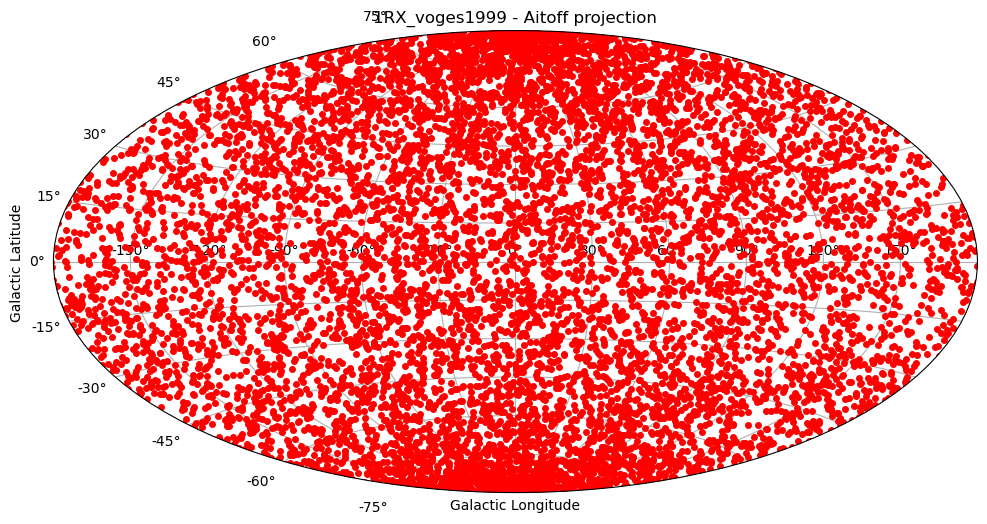

In [49]:
#Plot Galactic sky distribution 
plt.figure(1,figsize=(12,6))
plt.subplot(111, projection="aitoff")
plt.grid(True)
plt.plot(data_dict["Galactic Longitude"],data_dict["Galactic Latitude"], 'o', markersize=4, color="red")
plt.xlabel("Galactic Longitude")
plt.ylabel("Galactic Latitude")
plt.title("1RX_voges1999 - Aitoff projection")

out_name = os.path.join(results_dir,"1RX_Aitoff.png")
plt.savefig(out_name)

### Find the spatial correlations

Now you can go through the 4FGL sources and check which one have spatial correlation with 1RX sources. You can use the column Conf 95 SemiMajor as uncertainty in the position of the gamma-ray source, and build some statistics

In [35]:
#for instance, how many 4FGL sources are spatially correlated with 1RX?

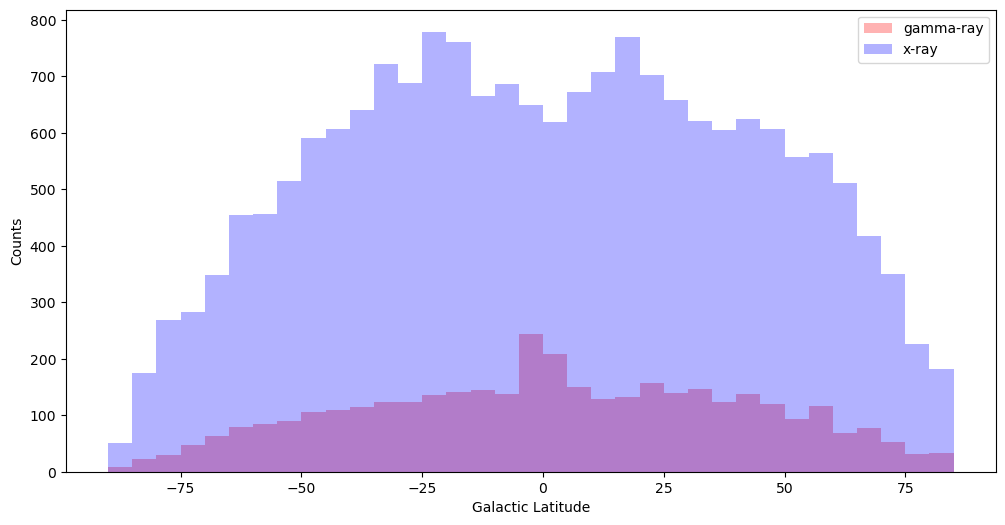

In [144]:
gamma_ray_sources_latitude = sources_df[mask_id]["GLAT"]
xray_sources_latitude = data_dict["Galactic Latitude"]
gamma_ray_sources_blazar_0 = (sources_df["CLASS1"]=="BCU")
gamma_ray_sources_blazar_1 = (sources_df["CLASS1"]=="BLL")
gamma_ray_sources_blazar_2 = (sources_df["CLASS1"]=="FSRQ")

plt.figure(2,figsize=(12,6))

b_bins=np.arange(-90,90,5)

plt.hist(gamma_ray_sources_latitude,bins=b_bins,color="red",label="gamma-ray",alpha=0.3)
plt.hist(xray_sources_latitude,bins=b_bins,color="blue",label="x-ray",alpha=0.3)

#plt.hist(sources_df[mask_psr]["GLAT"],bins=b_bins,color="blue",label="PSR",alpha=0.3)

plt.xlabel("Galactic Latitude")
plt.ylabel("Counts")
plt.legend()

out_name = os.path.join(results_dir,"Latitude_distribution.png")
plt.savefig(out_name)

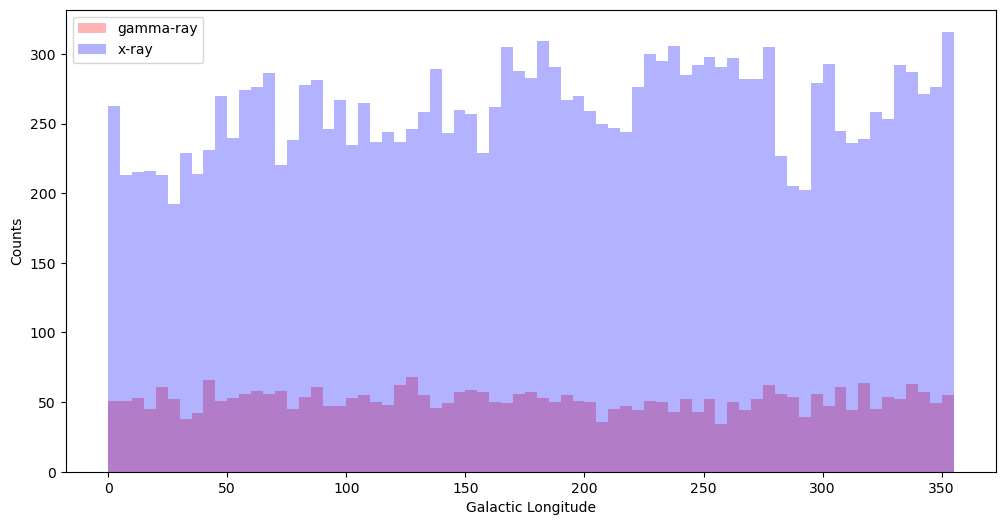

In [145]:
gamma_ray_sources_longitude = sources_df[mask_id]["GLON"]
xray_sources_longitude = data_dict["Galactic Longitude"]


plt.figure(2,figsize=(12, 6))

b_bins=np.arange(0, 360, 5)

plt.hist(gamma_ray_sources_longitude,bins=b_bins,color="red",label="gamma-ray",alpha=0.3)
plt.hist(xray_sources_longitude,bins=b_bins,color="blue",label="x-ray",alpha=0.3)

plt.xlabel("Galactic Longitude")
plt.ylabel("Counts")
plt.legend()

out_name = os.path.join(results_dir,"Longitude_distribution.png")
plt.savefig(out_name)

In [ ]:
# For each CLASS1 source class in 4FGL, , find how many of these gamma-ray sources are spatially associated 
# with 1RX. 

In [120]:
#gamma_ray
#latitude - b
gamma_ray_sources_latitude_upper = gamma_ray_sources_latitude + sources_df[mask_id]["Conf_95_SemiMajor"]
gamma_ray_sources_latitude_upper_array = gamma_ray_sources_latitude_upper.values
gamma_ray_sources_latitude_lower = gamma_ray_sources_latitude - sources_df[mask_id]["Conf_95_SemiMajor"]
gamma_ray_sources_latitude_lower_array = gamma_ray_sources_latitude_lower.values
gamma_ray_sources_latitude_array = gamma_ray_sources_latitude.values
#longitude - l
gamma_ray_sources_longitude_upper = gamma_ray_sources_longitude + sources_df[mask_id]["Conf_95_SemiMajor"]
gamma_ray_sources_longitude_upper_array = gamma_ray_sources_longitude_upper.values
gamma_ray_sources_longitude_lower = gamma_ray_sources_longitude - sources_df[mask_id]["Conf_95_SemiMajor"]
gamma_ray_sources_longitude_lower_array = gamma_ray_sources_longitude_lower.values
gamma_ray_sources_longitude_array = gamma_ray_sources_longitude.values
#source type
gamma_ray_sources_class = sources_df[mask_id]["CLASS1"]
#xray
xray_sources_latitude = data_dict["Galactic Latitude"]
xray_sources_longitude = data_dict["Galactic Longitude"]

In [121]:
event_count = np.count_nonzero(gamma_ray_sources_latitude_lower_array)
print("Number of events:", event_count)

Number of events: 3729


In [123]:
count = 0
dtype = [('xray_b', float), ('xray_l', float), ('gamma_b', float), ('gamma_l', float), ('dif_angle', float), ('class', object)]
find_sources = np.empty(0, dtype=dtype)

for lower_b, upper_b, lower_l, upper_l, gamma_b, gamma_l, name in zip(
    gamma_ray_sources_latitude_lower_array,
    gamma_ray_sources_latitude_upper_array,
    gamma_ray_sources_longitude_lower_array,
    gamma_ray_sources_longitude_upper_array,
    gamma_ray_sources_latitude_array,
    gamma_ray_sources_longitude_array,
    gamma_ray_sources_class
):
    for xray_b, xray_l in zip(xray_sources_latitude, xray_sources_longitude):
        if (lower_b <= xray_b <= upper_b) and (lower_l <= xray_l <= upper_l):
            count += 1
            c1_gal = SkyCoord(gamma_l, gamma_b, unit='deg', frame='galactic')
            c2_gal = SkyCoord(xray_l, xray_b, unit='deg', frame='galactic')
            diff_angle = c1_gal.separation(c2_gal).deg 
            find_sources = np.append(find_sources, np.array([(xray_b, xray_l, gamma_b, gamma_l, diff_angle, name)], dtype=dtype))
            break

print("Number of events:", count)

Number of events: 736


In [ ]:
# Now, select 3 source classes you prefer. Dor each of these source classes, you can plot a distribution of l and b 

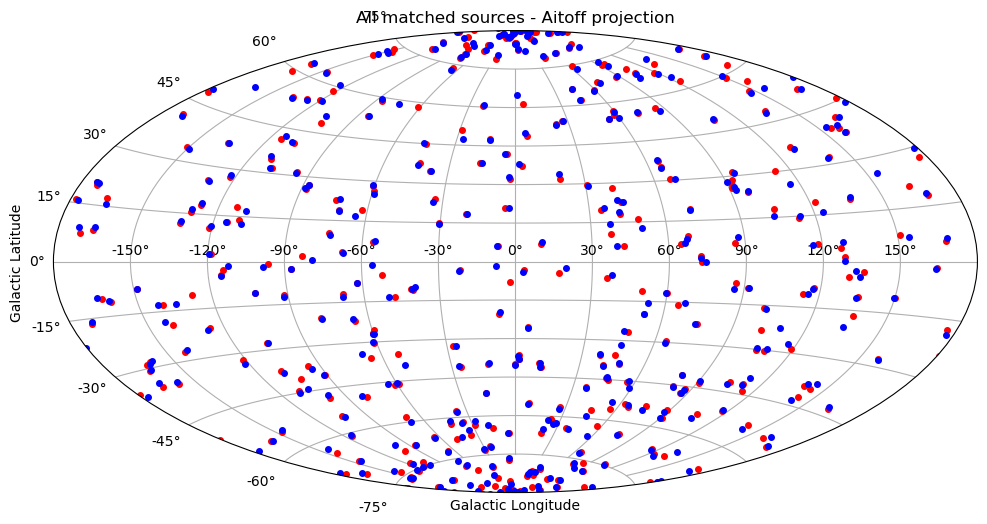

In [146]:
#Plot Galactic sky distribution 
plt.figure(1,figsize=(12,6))
plt.subplot(111, projection="aitoff")
plt.grid(True)
plt.plot(find_sources["xray_l"],find_sources["xray_b"], 'o', markersize=4, color="red", label="x ray")
plt.plot(find_sources["gamma_l"],find_sources["gamma_b"], 'o', markersize=4, color="blue", label="gamma ray")
plt.xlabel("Galactic Longitude")
plt.ylabel("Galactic Latitude")
plt.title("All matched sources - Aitoff projection")

out_name = os.path.join(results_dir,"all_matched_Aitoff.png")
plt.savefig(out_name)

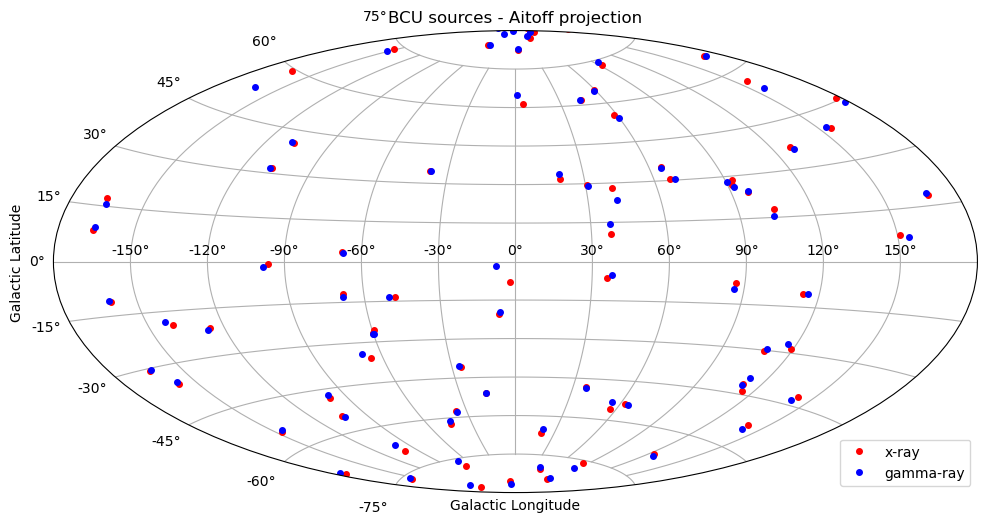

<Figure size 640x480 with 0 Axes>

In [147]:
#Plot Galactic sky distribution 
plt.figure(1,figsize=(12,6))
plt.subplot(111, projection="aitoff")
plt.grid(True)

plt.plot(find_sources[find_sources['class'] == 'BCU']["xray_l"],
         find_sources[find_sources['class'] == 'BCU']["xray_b"],
         'o', markersize=4, color="red", label="x-ray")

plt.plot(find_sources[find_sources['class'] == 'BCU']["gamma_l"],
         find_sources[find_sources['class'] == 'BCU']["gamma_b"],
         'o', markersize=4, color="blue", label="gamma-ray")

plt.xlabel("Galactic Longitude")
plt.ylabel("Galactic Latitude")
plt.title("BCU sources - Aitoff projection")
plt.legend()
plt.show()

out_name = os.path.join(results_dir,"BCU_matched_Aitoff.png")
plt.savefig(out_name)

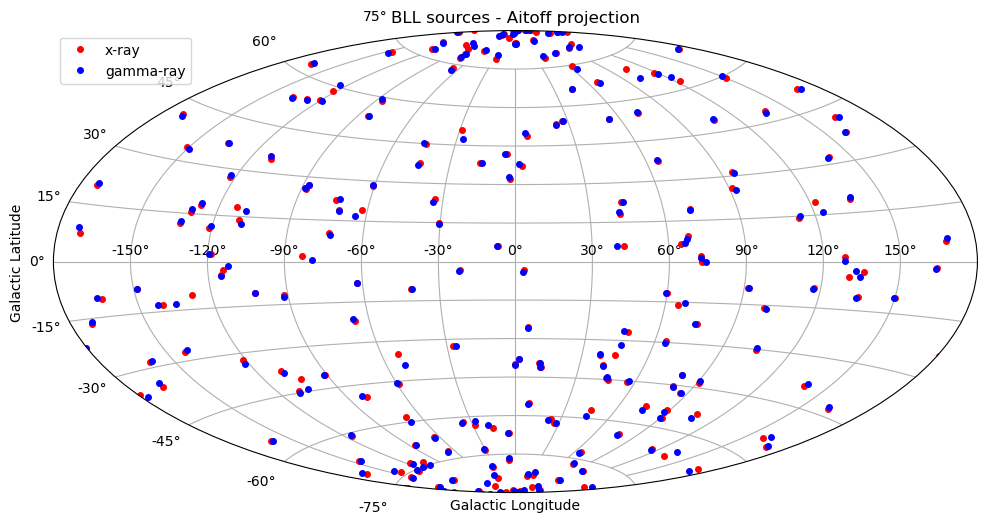

<Figure size 640x480 with 0 Axes>

In [148]:
#Plot Galactic sky distribution 
plt.figure(1,figsize=(12,6))
plt.subplot(111, projection="aitoff")
plt.grid(True)

plt.plot(find_sources[find_sources['class'] == 'BLL']["xray_l"],
         find_sources[find_sources['class'] == 'BLL']["xray_b"],
         'o', markersize=4, color="red", label="x-ray")

plt.plot(find_sources[find_sources['class'] == 'BLL']["gamma_l"],
         find_sources[find_sources['class'] == 'BLL']["gamma_b"],
         'o', markersize=4, color="blue", label="gamma-ray")

plt.xlabel("Galactic Longitude")
plt.ylabel("Galactic Latitude")
plt.title("BLL sources - Aitoff projection")
plt.legend()
plt.show()
out_name = os.path.join(results_dir,"BLL_matched_Aitoff.png")
plt.savefig(out_name)

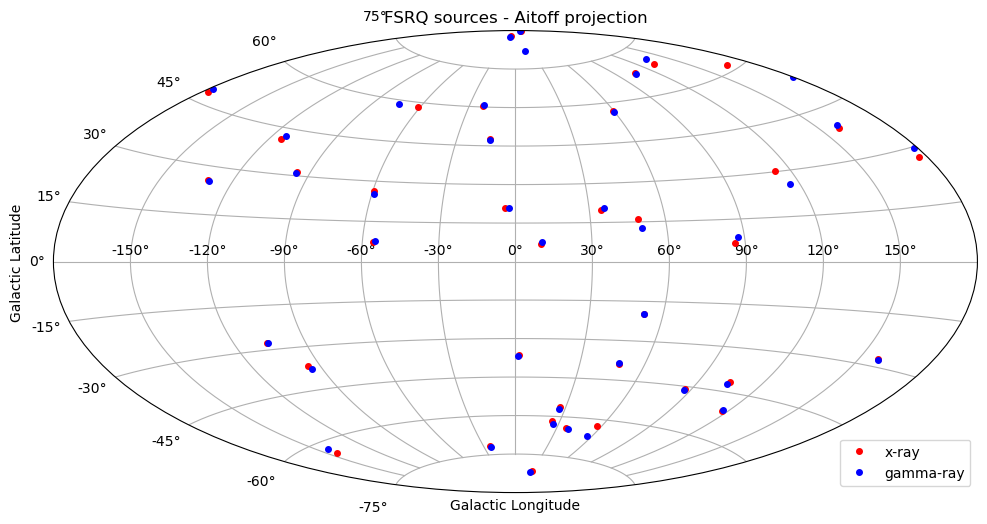

<Figure size 640x480 with 0 Axes>

In [149]:
#Plot Galactic sky distribution 
plt.figure(1,figsize=(12,6))
plt.subplot(111, projection="aitoff")
plt.grid(True)

plt.plot(find_sources[find_sources['class'] == 'FSRQ']["xray_l"],
         find_sources[find_sources['class'] == 'FSRQ']["xray_b"],
         'o', markersize=4, color="red", label="x-ray")

plt.plot(find_sources[find_sources['class'] == 'FSRQ']["gamma_l"],
         find_sources[find_sources['class'] == 'FSRQ']["gamma_b"],
         'o', markersize=4, color="blue", label="gamma-ray")

plt.xlabel("Galactic Longitude")
plt.ylabel("Galactic Latitude")
plt.title("FSRQ sources - Aitoff projection")
plt.legend()
plt.show()

out_name = os.path.join(results_dir,"FSRQ_matched_Aitoff.png")
plt.savefig(out_name)

In [ ]:
# For each of these source class you have selected, how is the distribution of the angular distances between 
# the gamma-ray and X-ray source?

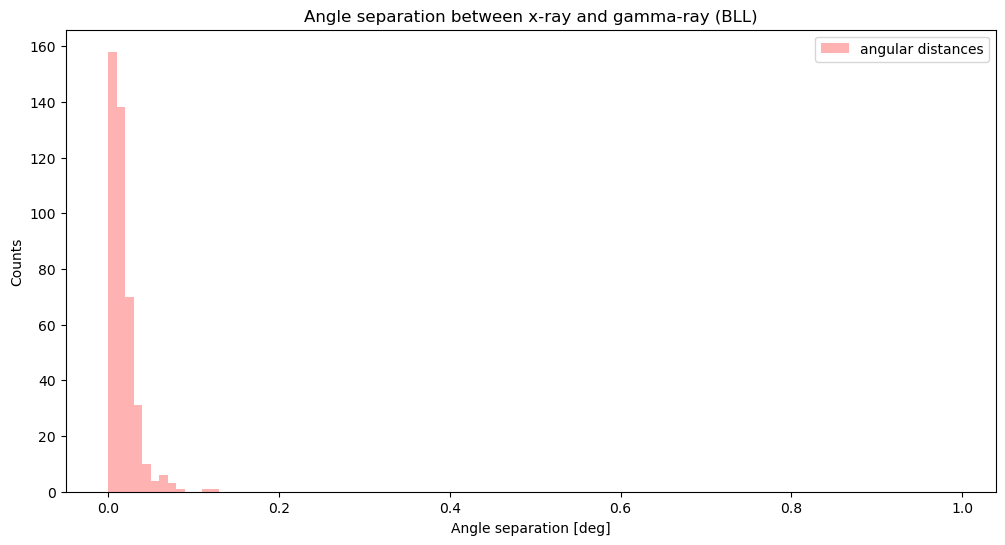

<Figure size 640x480 with 0 Axes>

In [150]:
plt.figure(2, figsize=(12, 6))
b_bins = np.arange(0, 1, 0.01)
plt.hist(find_sources[find_sources['class'] == 'BLL']["dif_angle"], bins=b_bins, color="red", label="angular distances", alpha=0.3)

plt.xlabel("Angle separation [deg]")
plt.ylabel("Counts")
plt.title("Angle separation between x-ray and gamma-ray (BLL)")
plt.legend()
plt.show()

out_name = os.path.join(results_dir,"BLL_angle_separation.png")
plt.savefig(out_name)

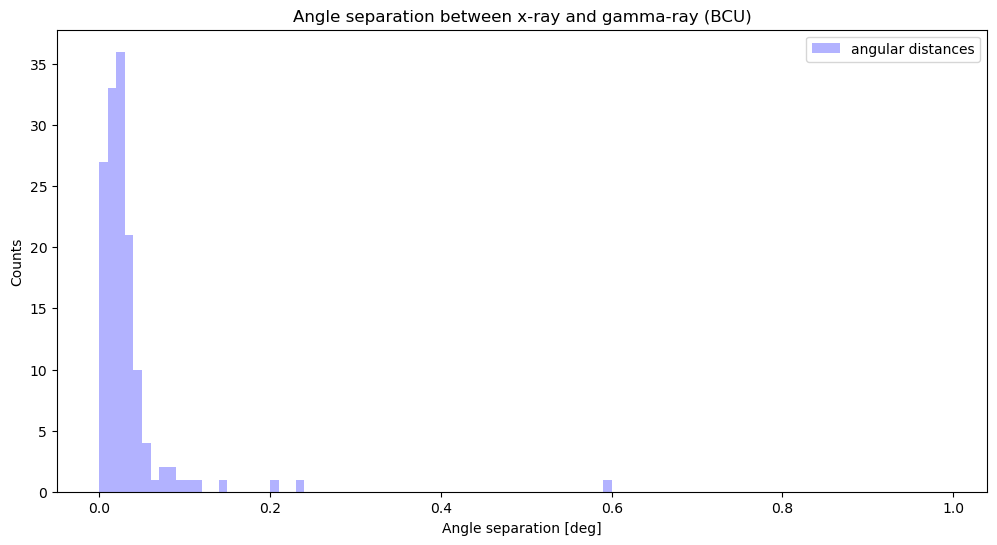

<Figure size 640x480 with 0 Axes>

In [151]:
plt.figure(2, figsize=(12, 6))
b_bins = np.arange(0, 1, 0.01)
plt.hist(find_sources[find_sources['class'] == 'BCU']["dif_angle"], bins=b_bins, color="blue", label="angular distances", alpha=0.3)

plt.xlabel("Angle separation [deg]")
plt.ylabel("Counts")
plt.title("Angle separation between x-ray and gamma-ray (BCU)")
plt.legend()
plt.show()

out_name = os.path.join(results_dir,"BCU_angle_separation.png")
plt.savefig(out_name)

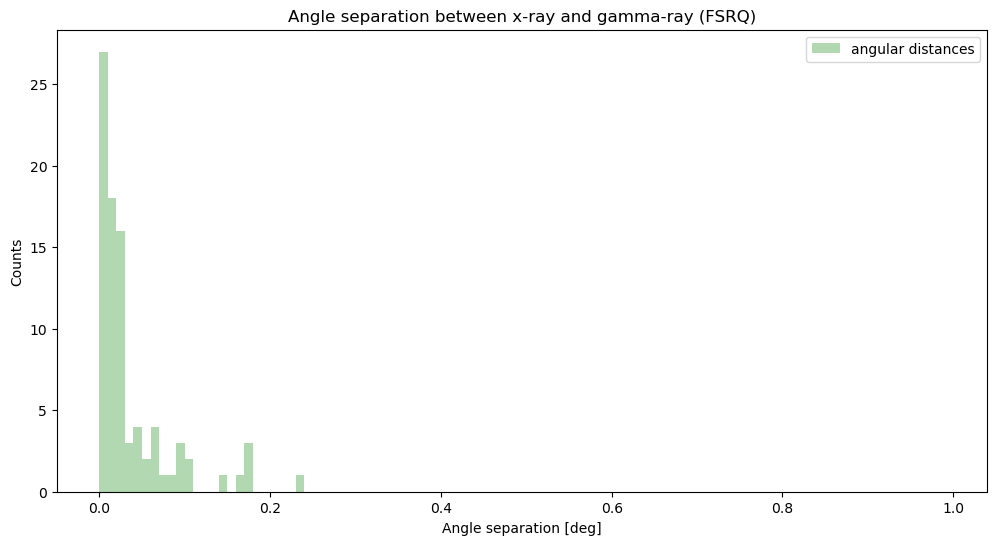

<Figure size 640x480 with 0 Axes>

In [152]:
plt.figure(2, figsize=(12, 6))
b_bins = np.arange(0, 1, 0.01)
plt.hist(find_sources[find_sources['class'] == 'FSRQ']["dif_angle"], bins=b_bins, color="green", label="angular distances", alpha=0.3)

plt.xlabel("Angle separation [deg]")
plt.ylabel("Counts")
plt.title("Angle separation between x-ray and gamma-ray (FSRQ)")
plt.legend()
plt.show()


out_name = os.path.join(results_dir,"FSRQ_angle_separation.png")
plt.savefig(out_name)

Galactic Longitude### Final steps
Congratulations! Don't forget to save to Github (using git commit + git push)